In [6]:
%reload_ext autoreload
%autoreload 2

from IPython.display import HTML

import os
import itertools
import gc
import pickle
import random

import numpy as np
import pandas as pd
import pandas_summary as pds
import seaborn as sns

from zillow import *
from utils import *

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn_pandas import DataFrameMapper
from keras import backend as K

In [2]:
zdata = None

In [3]:
if zdata is not None:
    del zdata
    gc.collect()
zdata = DataLoader()
gc.collect()

0

In [4]:
_ = zdata.preprocessed.properties()

In [5]:
_ = zdata.preprocessed.training()

# Common Functions

In [34]:
t = zdata.preprocessed.training()
summarize(t)

,parcelid,logerror,logerror_percent,logerror_abs,transaction_month
count,90275,90275,90275,90275,90275
mean,1.29847e+07,0.0114572,3.25908,0.0684467,5.84985
std,2.50451e+06,0.161079,71.1017,0.146262,2.81269
min,1.07117e+07,-4.605,-98.9998,0,1
25%,1.15595e+07,-0.0253,-2.49826,0.0139,4
50%,1.25473e+07,0.006,0.601804,0.0325,6
75%,1.42276e+07,0.0392,3.99785,0.0694,8
max,1.62961e+08,4.737,11309.1,4.737,12
counts,90275,90275,90275,90275,90275
uniques,90150,1894,1894,1821,12


,rawcensustractandblock,fips,tract,block,fipstract
count,90275,90275,90275,90275,90275
unique,42670,3,3002,136,3014
top,060379203.391054,06037,0524.26,100,060590524.26
freq,84,58574,249,20478,249
counts,90275,90275,90275,90275,90275
uniques,42670,3,3002,136,3014
missing,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%
types,categorical,categorical,categorical,categorical,categorical


,tractblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip
count,NaN,90275,90275,90275,90275
mean,NaN,33087,2525.42,76051.1,96548.7
std,NaN,46444.8,805.695,140492,4125.02
min,NaN,-1,1286,-1,-1
25%,NaN,12447,1286,-1,96193
50%,NaN,24832,3101,-1,96393
75%,NaN,45457,3101,113455,96987
max,NaN,396556,3101,764167,399675
counts,90275,90275,90275,90275,90275
uniques,14356,178,3,495,389


,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt
count,90275,90275,90275,90275,90275
mean,-0.102099,-0.976206,-0.659629,2.27947,3.03187
std,2.13136,0.465302,18.2246,1.00427,1.15644
min,-1,-1,-1,0,0
25%,-1,-1,-1,2,2
50%,-1,-1,-1,2,3
75%,1,-1,-1,3,4
max,13,21,1555,20,16
counts,90275,90275,90275,90275,90275
uniques,7,7,40,23,17


,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,threequarterbathnbr,fullbathcnt
count,90275,90275,90275,90275,90275
mean,-0.999114,3.1719,2.26589,-0.732783,2.19879
std,0.0665595,3.50442,1.04017,0.683171,1.0253
min,-1,-1,-1,-1,-1
25%,-1,-1,2,-1,2
50%,-1,4,2,-1,2
75%,-1,7,3,-1,3
max,4,12,20,4,20
counts,90275,90275,90275,90275,90275
uniques,2,9,23,5,15


,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13
count,90275,90275,90275,90275,90275
mean,-0.511648,101.449,1760.2,1654.93,-0.486203
std,5.69925,400.033,937.047,966.94,26.9482
min,-1,-1,-1,-1,-1
25%,-1,-1,1176,1118,-1
50%,-1,-1,1535,1476,-1
75%,-1,-1,2089,2013,-1
max,66,7625,22741,20013,1584
counts,90275,90275,90275,90275,90275
uniques,2,1887,5103,4983,12


,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fireplacecnt,garagecarcnt
count,90275,90275,90275,90275,90275
mean,93.0039,102.024,9.74265,-0.767167,-0.0674827
std,509.935,404.487,181.833,0.692929,1.36951
min,-1,-1,-1,-1,-1
25%,-1,-1,-1,-1,-1
50%,-1,-1,-1,-1,-1
75%,-1,-1,-1,-1,2
max,22741,8352,7224,5,24
counts,90275,90275,90275,90275,90275
uniques,1916,1899,361,6,16


,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,lotsizesquarefeet,poolcnt
count,90275,NaN,90275,90275,90275
mean,113.913,NaN,2.0607,25837.1,-0.603412
std,224.184,NaN,3.76097,115043,0.797434
min,-1,NaN,-1,-1,-1
25%,-1,NaN,-1,5000,-1
50%,-1,NaN,2,6756,-1
75%,0,NaN,2,10396.5,-1
max,7339,NaN,24,6.97101e+06,1
counts,90275,90275,90275,90275,90275
uniques,871,2,13,20017,2


,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode
count,90275,90275,90275,90275,NaN
mean,4.5905,-0.974279,-0.973326,-0.630086,NaN
std,56.0202,0.225348,0.229428,0.77653,NaN
min,-1,-1,-1,-1,NaN
25%,-1,-1,-1,-1,NaN
50%,-1,-1,-1,-1,NaN
75%,-1,-1,-1,-1,NaN
max,1750,1,1,1,NaN
counts,90275,90275,90275,90275,90275
uniques,274,2,2,2,78


,propertylandusetypeid,propertyzoningdesc,roomcnt,storytypeid,typeconstructiontypeid
count,90275,NaN,90275,90275,90275
mean,261.832,NaN,1.47852,-0.996189,-0.976782
std,5.1829,NaN,2.81963,0.174558,0.40355
min,31,NaN,0,-1,-1
25%,261,NaN,0,-1,-1
50%,261,NaN,0,-1,-1
75%,266,NaN,0,-1,-1
max,275,NaN,18,7,13
counts,90275,90275,90275,90275,90275
uniques,14,1997,17,2,4


,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories
count,90275,90275,90275,90275,90275
mean,0.364154,8.11971,-0.670939,1968.93,-0.443855
std,1.19535,64.2693,15.0898,24.0559,1.05625
min,-1,-1,-1,1885,-1
25%,-1,-1,-1,1953,-1
50%,1,-1,-1,1970,-1
75%,1,-1,-1,1987,-1
max,143,2678,1366,2016,4
counts,90275,90275,90275,90275,90275
uniques,11,568,74,131,5


,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
count,NaN,90275,90275,90275,90275
mean,NaN,179335,457668,278332,5983.58
std,NaN,209015,554883,400494,6838.82
min,NaN,-1,-1,-1,-1
25%,NaN,80641,199012,82227.5,2872.47
50%,NaN,131507,342872,192960,4542.44
75%,NaN,210042,540589,345415,6900.6
max,NaN,9.9481e+06,2.775e+07,2.45e+07,321936
counts,90275,90275,90275,90275,90275
uniques,2,55451,55939,57067,85111


,assessmentyear,assessmentyear_age,taxdelinquencyflag,taxdelinquencyyear,taxdelinquencyyear_age
count,90275,90275,NaN,90275,90275
mean,2015,2,NaN,38.7849,1978.22
std,0,0,NaN,280.283,280.283
min,2015,2,NaN,-1,2
25%,2015,2,NaN,-1,2018
50%,2015,2,NaN,-1,2018
75%,2015,2,NaN,-1,2018
max,2015,2,NaN,2015,2018
counts,90275,90275,90275,90275,90275
uniques,1,1,2,12,12


,yearbuilt_adjusted,yearbuilt_age,latitude,latitude_adjusted,longitude
count,90275,90275,90275,90275,90275
mean,167.93,48.0696,3.40054e+07,3934.7,-1.18199e+08
std,24.0559,24.0559,264965,264965,360603
min,84,1,3.33393e+07,-662180,-1.19448e+08
25%,152,30,3.38115e+07,-189938,-1.18412e+08
50%,169,47,3.40215e+07,20024,-1.18173e+08
75%,186,64,3.41727e+07,171268,-1.17922e+08
max,215,132,3.4816e+07,814532,-1.17555e+08
counts,90275,90275,90275,90275,90275
uniques,131,131,63620,63620,57817


,longitude_adjusted,distance,longitude_adjusted_fips,latitude_adjusted_fips,distance_fips
count,90275,90275,90275,90275,90275
mean,3059.69,1.06129e+12,-2154.89,11125,6.7926e+11
std,360603,0,196390,187573,0
min,-1.24594e+06,1.06129e+12,-663376,-739816,6.7926e+11
25%,-209764,1.06129e+12,-146456,-100786,6.7926e+11
50%,28496,1.06129e+12,-7848,-4104,6.7926e+11
75%,280340,1.06129e+12,136072,93070,6.7926e+11
max,647000,1.06129e+12,592720,736896,6.7926e+11
counts,90275,90275,90275,90275,90275
uniques,57817,1,50003,58492,1


,N-LivingAreaError,N-LivingAreaProp,N-LivingAreaProp2,N-ExtraSpace,N-ExtraSpace-2
count,90275,90275,90275,90275,90275
mean,-104.26,-148.668,-1654.97,24076.9,-1561.93
std,540.089,462.549,966.873,115081,1227.33
min,-22741,-9158,-20013,-15562,-20014
25%,1,0.0790702,-2013,3123,-2014
50%,1,0.202099,-1476,5058,-1477
75%,1,0.301051,-1118,8281,-1119
max,1,11.497,1,6.96976e+06,22742
counts,90275,90275,90275,90275,90275
uniques,2104,74982,6898,25578,6898


/home/terence/anaconda3/envs/deeplearn/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,N-TotalRooms,N-AvRoomSize,N-ExtraRooms,N-ValueProp,N-GarPoolAC
count,90275,90275,90275,90275,90275
mean,5.31134,NaN,-3.83283,1.21695,0.0058931
std,1.96129,NaN,3.23612,4.03596,0.0765405
min,0,-inf,-26,-0.0454545,0
25%,4,inf,-6,0.419103,0
50%,5,NaN,-4.5,0.763486,0
75%,6,inf,-2,1.50004,0
max,26,inf,10,984.82,1
counts,90275,90275,90275,90275,90275
uniques,39,5638,55,80473,2


,N-location,N-location-2,N-location-2round,N-latitude-round,N-longitude-round
count,90275,90275,90275,90275,90275
mean,-8.41935e+07,-4.01946e+15,-4.01946e+15,3.40054e+07,-1.18199e+08
std,294470,3.98262e+13,3.98262e+13,264995,360619
min,-8.50829e+07,-4.13798e+15,-4.13798e+15,3.334e+07,-1.1945e+08
25%,-8.43541e+07,-4.04915e+15,-4.04915e+15,3.381e+07,-1.1841e+08
50%,-8.41926e+07,-4.0194e+15,-4.0194e+15,3.402e+07,-1.1817e+08
75%,-8.40391e+07,-3.9916e+15,-3.9916e+15,3.417e+07,-1.1792e+08
max,-8.29732e+07,-3.92674e+15,-3.92674e+15,3.482e+07,-1.1755e+08
counts,90275,90275,90275,90275,90275
uniques,55678,73679,71803,146,183


,N-ValueRatio,N-TaxScore,N-taxdelinquencyyear-2,N-taxdelinquencyyear-3,N-life
count,90275,90275,90275,90275,90275
mean,66.8744,6.34109e+09,80062,1.61191e+08,1979.22
std,1217.59,6.50199e+10,564028,1.13559e+09,280.283
min,-224400,-224400,1,-1,3
25%,70.2021,5.70667e+08,1,-1,2019
50%,79.327,1.51961e+09,1,-1,2019
75%,84.1761,3.65563e+09,1,-1,2019
max,4997.62,8.93373e+12,4.06022e+06,8.18135e+09,2019
counts,90275,90275,90275,90275,90275
uniques,88670,89496,12,12,12


,N-zip_count,N-city_count,N-county_count,N-ACInd,N-HeatInd
count,90275,90275,90275,90275,90275
mean,10176.1,175868,1.52281e+06,0.997618,0.999158
std,4375.08,269525,673786,0.0487439,0.029003
min,1,17,222853,0,0
25%,6922,15191,741565,1,1
50%,9695,33795,2.00936e+06,1,1
75%,12468,93470,2.00936e+06,1,1
max,22021,670925,2.00936e+06,1,1
counts,90275,90275,90275,90275,90275
uniques,386,177,3,2,2


,N-PropType,N-structuretaxvaluedollarcnt-2,N-Avg-structuretaxvaluedollarcnt,N-Dev-structuretaxvaluedollarcnt
count,NaN,90275,90275,90275
mean,NaN,7.58478e+10,173968,0.553809
std,NaN,6.60639e+11,72305.9,0.812797
min,NaN,1,24087.4,1.71287e-05
25%,NaN,6.50297e+09,129907,0.200294
50%,NaN,1.72941e+10,180807,0.41342
75%,NaN,4.41179e+10,185656,0.664687
max,NaN,9.89647e+13,1.18327e+06,42.3516
counts,90275,90275,90275,90275
uniques,3,55451,178,80021


In [12]:
dropcols = set([
    'propertyzoningdesc', 
#     'propertycountylandusecode', 
#     'censustractandblock',
#     'rawcensustractandblock',
    
    'propertycountylandusecode', 
    'rawcensustractandblock',
#     'transaction_month',

    'finishedsquarefeet13',
    'finishedsquarefeet15',
    'finishedsquarefeet50',
    'finishedsquarefeet6',

    'pooltypeid10',
    'pooltypeid2',
    'pooltypeid7',
    
    'yardbuildingsqft17',
    'yardbuildingsqft26',
    
    'basementsqft',
    'decktypeid',
    'calculatedbathnbr',
    'regionidcounty',
    
    'N-ACInd',
    'fireplaceflag',
    'N-county_count',
])

ycols = ['logerror', 'logerror_abs', 'logerror_percent']

t = zdata.preprocessed.training().drop(dropcols, axis=1)

# cat_cols = t.select_dtypes(include=['object']).columns
cat_cols = set(zdata.preprocessed.categories) - set(dropcols)
cat_maps = [(c, LabelEncoder()) for c in cat_cols]
cat_mapper = DataFrameMapper(cat_maps)
cat_map_fit = cat_mapper.fit(zdata.preprocessed.properties())

con_cols = set(t.columns) - set(ycols) - set(cat_cols) - set(dropcols)
con_maps = [([c], StandardScaler()) for c in con_cols]
con_mapper = DataFrameMapper(con_maps)
con_map_fit = con_mapper.fit(zdata.preprocessed.training())

/home/terence/anaconda3/envs/deeplearn/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/terence/anaconda3/envs/deeplearn/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
def split_month(df, month):
    c = 'transaction_month'
    valid = df[df[c].astype('int') >= month]
    train = df[df[c].astype('int') < month]
#     return df[df[c] == month], df[df[c] != month], valid
    return train, valid

def month_folds(df):
    c = 'transaction_month'
    for m in range(1, 10):
        yield df[df[c] != m]
    yield df[df[c] < 10], df[df[c] >= 10]

def remove_outliers(X, y, ycol='logerror'):
    # return X, y
    t = zdata.preprocessed.transactions()
    l_min = t[ycol].quantile(.01)
    l_max = t[ycol].quantile(.99)
    f = (y >= l_min) & (y <= l_max)
    return X[f], y[f]

def transform(df):
    cat_cols = [ f[0] for f in cat_map_fit.features ]
    con_cols = [ f[0][0] for f in con_map_fit.features ]
    t = pd.DataFrame(np.concatenate([cat_map_fit.transform(df), con_map_fit.transform(df)], axis=1))
    t.columns = cat_cols + con_cols
    return t

def adapt(df):
    mustdropcols = set([
                'parcelid',
               ])

    mustdropcols = mustdropcols | set(dropcols)
    df = df.drop(mustdropcols, axis=1)

#     print(mustdropcols, dropcols)
    
    for c in set(zdata.preprocessed.categories) - mustdropcols:
#         print (c)
        enc = LabelEncoder()
        enc.fit(df[c].values)
        df[c] = enc.transform(df[c].values)

    con_cols = set(df.columns) - set(ycols) - set(zdata.preprocessed.categories) - set(mustdropcols)
    for c in con_cols:
        scaler = StandardScaler()
        
    
    return df

def show_importance(clf):
    imp = clf.get_fscore()
    imp = sorted(imp.items(), key=lambda x: x[1])

    df = pd.DataFrame(imp, columns=['feature', 'fscore'])
    df['fscore'] = df['fscore'] / df['fscore'].sum()

    df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
    plt.title('XGBoost Feature Importance')
    plt.xlabel('relative importance');
    return df

In [14]:
def batches(df):
    l = 'logerror'
    la = 'logerror_abs'
    m = 'transaction_month'
    la80 = df[la].quantile(0.8)
    la20 = df[la].quantile(0.2)
    y_sets = [ df[l] > 0, df[l] < 0, df[la] < la80, df[la] >= la80, df[la] <= la20, df[la] > la20 ]
    m_sets = [ range(1 + 3*i, 4 + 3*i) for i in range(4) ]
    for m_set in m_sets:
        yield ( [~df[m].astype(int).isin(m_set) & y_set for y_set in y_sets], df[m].astype(int).isin(m_set) )

In [28]:
xgb_params = {
    'eta': 0.037,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 1,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'lambda': 0.8,   
    'alpha': 0.4, 
#     'base_score': y_mean,
    'silent': 1
}

x_train = transform(zdata.preprocessed.training())
y_train = zdata.preprocessed.training()['logerror']
d_test = xgb.DMatrix(transform(zdata.preprocessed.prediction(0)).drop('transaction_month', axis=1))
train_meta = pd.DataFrame()
train_meta_preds = pd.DataFrame()

for q, (train_batches, valid_batch) in enumerate(batches(zdata.preprocessed.training())):
    valid_preds = pd.DataFrame()
    test_preds = pd.DataFrame()
    for i, train_batch in enumerate(train_batches):
        x_batch = x_train[train_batch].drop('transaction_month', axis=1)
        y_batch = y_train[train_batch]
        y_mean = y_batch.mean()
    
        # train classifiers
        d_train = xgb.DMatrix(x_batch, label=y_batch, silent=True)
        del x_batch, y_batch; gc.collect()

        watchlist = [(d_train, 'train')]
        evals_result = {}
        hist = xgb.cv(xgb_params, d_train, 10000, nfold=3, early_stopping_rounds=1, verbose_eval=100)
        clf = xgb.train(xgb_params, d_train, hist.shape[0], watchlist, evals_result=evals_result, 
                        early_stopping_rounds=1, verbose_eval=100)
        del d_train; gc.collect()
        
        # user the classifiers to predict on the validation set
        x_valid = x_train[valid_batch].drop('transaction_month', axis=1)
        d_valid = xgb.DMatrix(x_valid)
        del x_valid; gc.collect()
        
        valid_preds['clf{}'.format(i)] = clf.predict(d_valid)
        del d_valid; gc.collect()
        
        # predict also on the test set
        test_preds['clf{}'.format(i)] = clf.predict(d_test)
    
    # build the 'meta' training set for the meta learner
    train_batch = x_train[valid_batch].reset_index(drop=True)
    train_batch['logerror'] = y_train[valid_batch].reset_index(drop=True)
    train_meta = train_meta.append(train_batch)
    train_meta_preds = train_meta_preds.append(valid_preds)
    del valid_preds, train_batch; gc.collect()
    
    # save the predictions of the test set for the meta learner to predict on later
    to_pickle(test_preds, 'zillow/test_preds{}.pkl'.format(q))
    
to_pickle(train_meta, 'zillow/train_meta.pkl')
to_pickle(train_meta_preds, 'zillow/train_meta_preds.pkl')
del train_meta; gc.collect()

/home/terence/anaconda3/envs/deeplearn/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/terence/anaconda3/envs/deeplearn/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[0]	train-mae:0.427573+0.000222056	test-mae:0.427638+0.000474043
[100]	train-mae:0.0632917+6.14781e-05	test-mae:0.0675917+0.000366683
[0]	train-mae:0.42757
Will train until train-mae hasn't improved in 1 rounds.
[100]	train-mae:0.063991
[0]	train-mae:0.542889+0.000207725	test-mae:0.542891+0.000437297
[0]	train-mae:0.542883
Will train until train-mae hasn't improved in 1 rounds.
[0]	train-mae:0.478023+3.08257e-05	test-mae:0.478023+6.37303e-05
[100]	train-mae:0.0292947+6.52448e-05	test-mae:0.0295563+0.000138839
[0]	train-mae:0.478017
Will train until train-mae hasn't improved in 1 rounds.
[100]	train-mae:0.029305
[0]	train-mae:0.481648+0.00124456	test-mae:0.481783+0.00248157
[0]	train-mae:0.481642
Will train until train-mae hasn't improved in 1 rounds.
[0]	train-mae:0.48083+1.5748e-05	test-mae:0.48083+3.34365e-05
[100]	train-mae:0.011145+4.32049e-06	test-mae:0.0111473+5.29297e-05
[0]	train-mae:0.480828
Will train until train-mae hasn't improved in 1 rounds.
[100]	train-mae:0.01112
[0]	tr

0

In [29]:
test_preds = pd.DataFrame()
for df in ( from_pickle('zillow/test_preds{}.pkl'.format(i)) for i in range(4) ):
    test_preds = test_preds.add(df, fill_value=0)
test_preds = test_preds / 4
to_pickle(test_preds, 'zillow/test_preds.pkl')

In [30]:
train_meta = from_pickle('zillow/train_meta.pkl')
train_meta_preds = from_pickle('zillow/train_meta_preds.pkl')

In [122]:
def feature_split(df):
    return np.split(df, df.shape[1], axis=1)

def build_neural_network(cat_map_fit, con_map_fit):
    embsz = 4
    
    def categorical_input(fname, fclasses):
        vocsz = len(fclasses)
        inp = Input((1,), dtype='int64', name=fname+'_inp')
#         emb_init = keras.initializers.RandomUniform(minval=-0.06/embsz, maxval=0.06/embsz)
        out = Embedding(vocsz, embsz, input_length=1)(inp)
        out = Flatten(name=fname+'_flt')(out)
        out = Dense(1, name=fname+'_den', activation='relu', use_bias=False)(out)
        return inp, out

    def continuous_input(fname):
        inp = Input((1,), dtype='float32', name=fname+'_inp')
        out = Dense(1, name=fname+'_den', activation='relu', use_bias=False)(inp)
        return inp, out

    cat_in = [ categorical_input(f[0], f[1].classes_) for f in cat_map_fit.features ]
    con_in = [ continuous_input(f[0][0]) for f in con_map_fit.features ]
    clf_in = Input((6,), dtype='float32')
    all_in = concatenate([ o for _, o in cat_in ] + [ o for _, o in con_in ])
    den = Dense(512, activation='relu')(all_in)
    den = Dense(512, activation='relu')(den)
    den = Dense(6, activation='softmax')(den)
    out = dot([den, clf_in], axes=1)

    model = Model(inputs=[ i for i, _ in cat_in ] + [ i for i, _ in con_in ] + [ clf_in ], outputs=[out])
    
    return model

In [76]:
x_train = feature_split(train_meta.drop('logerror', axis=1).as_matrix())
x_train.append(train_meta_preds.as_matrix())
y_train = train_meta['logerror']

In [123]:
model = build_neural_network(cat_map_fit, con_map_fit)
opt = keras.optimizers.Adam(lr=0.01, decay=0.025)
model.compile(loss='mean_absolute_error', optimizer=opt)
model.summary()
gc.collect()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
typeconstructiontypeid_inp (Inpu (None, 1)             0                                            
____________________________________________________________________________________________________
propertylandusetypeid_inp (Input (None, 1)             0                                            
____________________________________________________________________________________________________
yearbuilt_inp (InputLayer)       (None, 1)             0                                            
____________________________________________________________________________________________________
buildingclasstypeid_inp (InputLa (None, 1)             0                                            
___________________________________________________________________________________________

82

In [124]:
hist = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1, verbose=1, shuffle=True)

Train on 81247 samples, validate on 9028 samples
Epoch 1/5
81247/81247 [==============================] - 20s - loss: 0.0678 - val_loss: 0.0657
Epoch 2/5
81247/81247 [==============================] - 17s - loss: 0.0678 - val_loss: 0.0657
Epoch 3/5
81247/81247 [==============================] - 17s - loss: 0.0678 - val_loss: 0.0657
Epoch 4/5
81247/81247 [==============================] - 17s - loss: 0.0678 - val_loss: 0.0657
Epoch 5/5
81247/81247 [==============================] - 17s - loss: 0.0678 - val_loss: 0.0657


In [121]:
hist.history

{'loss': [0.067813381681355311,
  0.067807516253115444,
  0.067807515964985118,
  0.06780751597167943,
  0.067807516106574303],
 'val_loss': [0.065730256439047577,
  0.065730256439047577,
  0.065730256439047577,
  0.065730256439047577,
  0.065730256439047577]}

# XGBoost

In [7]:
train = zdata.preprocessed.training()

x_train = train.drop(['logerror', 'logerror_abs', 'logerror_percent'], axis=1)
y_train = train['logerror']

x_train, y_train = remove_outliers(x_train, y_train)
y_mean = y_train.mean()

d_train = xgb.DMatrix(adapt(x_train), label=y_train, silent=True)

del x_train, y_train; gc.collect()

watchlist = [(d_train, 'train')]
evals_result = {}

regionidneighborhood
tract
architecturalstyletypeid
storytypeid
tractblock
fipstract
assessmentyear
heatingorsystemtypeid
airconditioningtypeid
block
yearbuilt
buildingclasstypeid
propertylandusetypeid
N-PropType
taxdelinquencyyear
regionidzip
typeconstructiontypeid
regionidcity
fips


In [14]:
xgb_params = {
    'eta': 0.037,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 1,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'lambda': 0.8,   
    'alpha': 0.4, 
#     'base_score': y_mean,
    'silent': 1
}

[0]	train-mae:0.47248+0.000213095	test-mae:0.472481+0.000446797
[100]	train-mae:0.0535497+0.000123764	test-mae:0.054562+0.000125052
(194, 4) 0.052678


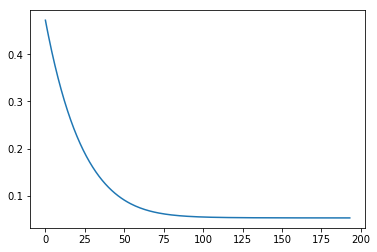

In [15]:
hist = xgb.cv(xgb_params, d_train, 10000, nfold=3, early_stopping_rounds=1, verbose_eval=100)
plt.plot(hist.index, hist['test-mae-mean'])
print(hist.shape, list(hist['test-mae-mean'])[-1])

## TEST CV: 0.0526346666667

[0]	train-mae:0.472495
Will train until train-mae hasn't improved in 1 rounds.
[100]	train-mae:0.053739


0.051101

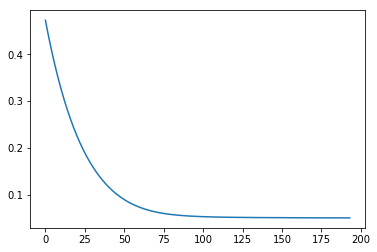

In [16]:
clf = xgb.train(xgb_params, d_train, hist.shape[0], watchlist, evals_result=evals_result, 
                     early_stopping_rounds=1, verbose_eval=100)

plt.plot(range(len(evals_result['train']['mae'])), evals_result['train']['mae'])
evals_result['train']['mae'][-1]

,feature,fscore
0,typeconstructiontypeid,0.000102
1,storytypeid,0.000204
2,architecturalstyletypeid,0.000407
3,poolsizesum,0.000611
4,fips,0.000713
5,fullbathcnt,0.001018
6,fireplacecnt,0.001120
7,threequarterbathnbr,0.001120
8,buildingclasstypeid,0.001221
9,N-PropType,0.001527


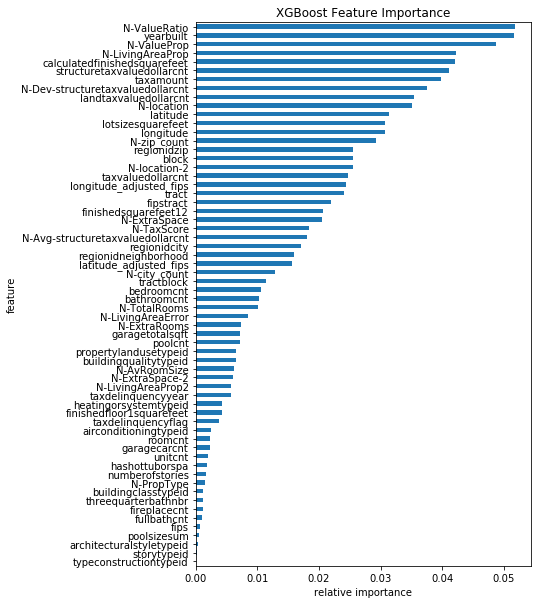

In [292]:
show_importance(clf)

## train-mae:0.03376

In [210]:
del d_train; gc.collect()

19903

In [293]:
subm = pd.DataFrame()
months = [10, 11, 12, 22, 23, 24]
dates = ['201610', '201611', '201612', '201710', '201711', '201712']
for month, date in zip(months, dates):
    print('Predicting...', date)

    merged = zdata.preprocessed.prediction(month)
    subm['ParcelId'] = merged['parcelid']
    merged['N-PropType'].replace({-1: "Unknown"}, inplace=True)
    merged = adapt(merged)

    dm_test = xgb.DMatrix(merged)
    del merged; gc.collect()

    subm[date] = clf.predict(dm_test)
    del dm_test; gc.collect()
    break
    
for month, date in zip(months, dates):
    subm[date] = subm['201610']

subm.to_csv('zillow/submission.xgb.csv.gz', index=False, float_format='%.4f', compression='gzip')

Predicting... 201610
assessmentyear
heatingorsystemtypeid
storytypeid
buildingclasstypeid
regionidneighborhood
propertylandusetypeid
typeconstructiontypeid
regionidzip
architecturalstyletypeid
N-PropType
airconditioningtypeid
taxdelinquencyyear
fipstract
fips
yearbuilt
tractblock
tract
regionidcity
block


In [203]:
zdata.preprocessed.properties()['N-PropType'].unique()

array(['Not Built', 'Home', 'Mixed', -1], dtype=object)

### Tuned MAE: 0.06472

# LightGBM

In [ ]:
import lightgbm as lgb

In [ ]:
https://www.coindesk.com/##### RUN LIGHTGBM
params = {
    'learning_rate': 0.0025,
    'max_bin': 255,
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l1',
    'num_leaves': 512,
    'bagging_fraction': 0.65,
    'bagging_freq': 40,
    'feature_fraction': 0.3,
    'min_data': 200,
    'min_hessian': 1,
#     'lambda_l2': 1,
    'verbose': 1,
    'num_threads': 3,
}

train = zdata.preprocessed.training()

x_train = train.drop(['logerror', 'logerror_abs', 'logerror_percent'], axis=1)
y_train = train['logerror']

x_train, y_train = remove_outliers(x_train, y_train)
del train; gc.collect()

categoricals = set(x_train.select_dtypes(include=['object']).columns) - dropcols

d_train = lgb.Dataset(adapt(x_train), label=y_train)
del x_train, y_train; gc.collect()

print("\nFitting LightGBM model ...")
clf = lgb.train(params, d_train, 1000, categorical_feature=categoricals, valid_sets=[d_train], early_stopping_rounds=1, verbose_eval=100)
# lgb.cv(params, d_train, 10000, nfold=4, early_stopping_rounds=10, verbose_eval=100)

del d_train; gc.collect()

0.0368519 + 0.00012879

In [ ]:
subm = pd.DataFrame()
months = [10, 11, 12, 22, 23, 24]
dates = ['201610', '201611', '201612', '201710', '201711', '201712']
for month, date in zip(months, dates):
    print('Predicting...', date)

    merged = zdata.preprocessed.prediction(month)
    subm['ParcelId'] = merged['parcelid']
    merged = adapt(merged)

    subm[date] = clf.predict(merged)
    del merged; gc.collect()

subm.to_csv('zillow/submission.lgb.csv.gz', index=False, float_format='%.4f', compression='gzip')

# Neural Network

In [ ]:
dropcols = ['censustractandblock', 'rawcensustractandblock', 'propertyzoningdesc', 'parcelid', 'calculatedbathnbr', 'transaction_month']
ycols = ['logerror', 'logerror_abs', 'logerror_percent']

t = zdata.preprocessed.training().drop(dropcols, axis=1)

# cat_cols = t.select_dtypes(include=['object']).columns
cat_cols = set(zdata.preprocessed.categories) - set(dropcols)
cat_maps = [(c, LabelEncoder()) for c in cat_cols]
cat_mapper = DataFrameMapper(cat_maps)

con_cols = set(t.columns) - set(ycols) - set(cat_cols) - set(dropcols)
con_maps = [([c], StandardScaler()) for c in con_cols]
con_mapper = DataFrameMapper(con_maps)

In [ ]:
def split_train(df, month):
    c = 'transaction_month'
    valid = df[df[c].astype('int') >= 10]
    train = df[df[c].astype('int') < 10]
#     return df[df[c] == month], df[df[c] != month], valid
    return train, valid

def feature_split(df):
    return np.split(df, df.shape[1], axis=1)

def remove_outliers(X, y, ycol='logerror'):
    # return X, y
    t = zdata.preprocessed.transactions()
    l_min = t[ycol].quantile(.05)
    l_max = t[ycol].quantile(.95)
    f = (y >= l_min) & (y <= l_max)
    return X[f], y[f]

class DenseStack:
    def __init__(self, inp, layers, units, outputs):
        self.units = units
        self.input = inp
        self.dense = [ Dense(units, activation='relu', kernel_initializer='random_uniform') for l in range(layers) ]
        b = BatchNormalization()(inp)
        b = Dropout(0.01)(b)
        din = b
        for d in self.dense:
#             d.trainable = False
            din = d(din)
#         self.out = Dense(outputs, activation='linear', kernel_initializer='random_uniform')
#         self.out.trainable = False
#         self.output = self.out(din)
        self.output = din
        
    def set_trainable(self, trainable):
        for d in self.dense: 
            d.trainable = trainable
        self.out.trainable = trainable

def build_neural_network(cat_map_fit, con_map_fit):
    embsz = 16
    
    def categorical_input(fname, fclasses):
        vocsz = len(fclasses)
        inp = Input((1,), dtype='int64', name=fname+'_inp')
#         emb_init = keras.initializers.RandomUniform(minval=-0.06/embsz, maxval=0.06/embsz)
        out = Embedding(vocsz, embsz, input_length=1)(inp)
        out = Flatten(name=fname+'_flt')(out)
        out = Dense(1, name=fname+'_den', activation='relu', use_bias=False, kernel_initializer='zeros')(out)
        return inp, out

    def continuous_input(fname):
        inp = Input((1,), dtype='float32', name=fname+'_inp')
        out = Dense(1, name=fname+'_den', activation='relu', use_bias=False, kernel_initializer='zeros')(inp)
        return inp, inp

    cat_in = [ categorical_input(f[0], f[1].classes_) for f in cat_map_fit.features ]
    con_in = [ continuous_input(f[0][0]) for f in con_map_fit.features ]
    all_in = concatenate([ o for _, o in cat_in ] + [ o for _, o in con_in ])
    d1 = DenseStack(all_in, 2, 256, 128)
    n = concatenate([ d1.output, all_in ])
    d2 = DenseStack(n, 2, 256, 128)
    n = concatenate([ d2.output, all_in ])
    d3 = DenseStack(n, 2, 256, 128)
    den = Dense(1, activation='linear')(d3.output)
    

    model = Model(inputs=[ i for i, _ in cat_in ] + [ i for i, _ in con_in ], outputs=[den])
    
    return model

In [ ]:
train, valid = split_train(t, 9)
x_train, y_train = train, train['logerror']
x_train, y_train = remove_outliers(x_train, y_train)
x_valid, y_valid = valid.drop('logerror', axis=1), valid['logerror']
con_map_fit = con_mapper.fit(x_train)
cat_map_fit = cat_mapper.fit(zdata.preprocessed.properties())
train_features = np.concatenate([cat_map_fit.transform(x_train), con_map_fit.transform(x_train)], axis=1)
valid_features = np.concatenate([cat_map_fit.transform(x_valid), con_map_fit.transform(x_valid)], axis=1)

In [ ]:
x_train, y_train = t, t['logerror']
x_train, y_train = remove_outliers(x_train, y_train)
con_map_fit = con_mapper.fit(x_train)
cat_map_fit = cat_mapper.fit(zdata.preprocessed.properties())
train_features = np.concatenate([cat_map_fit.transform(x_train), con_map_fit.transform(x_train)], axis=1)

In [ ]:
model = build_neural_network(cat_map_fit, con_map_fit)
opt = keras.optimizers.Adam(lr=0.001, decay=0.025)
model.compile(loss='mean_absolute_error', optimizer=opt)
model.summary()
gc.collect()

In [ ]:
def clr(epoch, lr_min=0.0001, lr_max=0.001, cycle=10):
    f = abs((epoch % cycle) - (cycle/2)) * 2 / cycle
    lr = lr_max - (lr_max - lr_min) * (1 - f)
    return lr

# for i in range(100):
#     print (clr(i))

clrs = keras.callbacks.LearningRateScheduler(clr)
mc = keras.callbacks.ModelCheckpoint('zillow/best_checkpoint.model', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
es = keras.callbacks.EarlyStopping(patience=5)
rlr = keras.callbacks.ReduceLROnPlateau(patience=1)

In [ ]:
hist = model.fit(feature_split(train_features), y_train, batch_size=64, epochs=20, validation_split=0.1,
             verbose=1, shuffle=True, callbacks=[clrs, es, rlr])

In [ ]:
hist

In [ ]:
del train_features, x_train, y_train, t; gc.collect()

In [ ]:
subm = pd.DataFrame()
months = [10, 11, 12, 22, 23, 24]
dates = ['201610', '201611', '201612', '201710', '201711', '201712']
for month, date in zip(months, dates):
    print('Constructing prediction set...', date)
    merged = zdata.preprocessed.prediction(month)
    subm['ParcelId'] = merged['parcelid']
    merged = merged.drop(dropcols, axis=1)
    merged = np.concatenate([cat_map_fit.transform(merged), con_map_fit.transform(merged)], axis=1)
    print('Predicting...', date)
    subm[date] = model.predict(feature_split(merged))
    subm.to_csv('zillow/submission.nn.{}.csv.gz'.format(month), index=False, float_format='%.4f', compression='gzip')
    del merged; gc.collect()

subm.to_csv('zillow/submission.nn.csv.gz', index=False, float_format='%.4f', compression='gzip')

In [ ]:
wgt_x = 0.6
wgt_l = 0.3
wgt_n = 1 - wgt_l - wgt_x

xsub = pd.read_csv('zillow/submission.xgb.csv.gz').set_index('ParcelId')
lsub = pd.read_csv('zillow/submission.lgb.csv.gz').set_index('ParcelId')
nsub = pd.read_csv('zillow/submission.nn.csv.gz').set_index('ParcelId')

esub = xsub * wgt_x + lsub * wgt_l + nsub * wgt_n
esub.to_csv('zillow/submission.ens.csv.gz', index=True, float_format='%.4f', compression='gzip')

In [ ]:
test = pd.read_csv('zillow/5355271.csv.gz')

In [ ]:
preds = test.set_index('ParcelId').mean(axis=1)

In [ ]:
subm = pd.DataFrame()
subm['ParcelId'] = preds.index
for month, date in zip(months, dates):
    subm[date] = preds.values
subm

In [ ]:
subm.to_csv('zillow/5355271.mean.csv.gz', index=False, float_format='%.4f', compression='gzip')

# Experiments

In [ ]:
zdata.transactions()['logerror'].describe()

In [ ]:
t = zdata.transactions()

In [ ]:
t.loc[t.logerror.abs() <= 2*t.logerror.std(), ['logerror']].describe()

In [ ]:
c = 'logerror'
e_min = t[c].quantile(0.01)
e_max = t[c].quantile(0.99)
no_outliers = t.loc[(t[c] >= e_min) & (t[c] <= e_max), ['logerror']]
sns.distplot(no_outliers)
no_outliers.describe()

In [4]:
p = zdata.properties()
cln = pd.DataFrame()
cln['parcelid'] = p['parcelid']

In [10]:
def split_census(df):
    c = 'rawcensustractandblock'
    df[c] = df[c].astype('str')
    df['fips'] = df[c].str.slice(0, 5).replace('nan', '')
    df['tract'] = df[c].str.slice(5, 12)
    df['block'] = df[c].str.slice(12, -1)
    df['fipstract'] = df[c].str.slice(0, 12)
    df['tractblock'] = df[c].str.slice(5, -1)
    return df

In [18]:
c = 'rawcensustractandblock'
cln[c] = p[c]
cln = split_census(cln)
cln[c].replace('nan', np.nan, inplace=True)
c = 'regionidcity'
cln[c] = p[c]

In [19]:
r = cln['rawcensustractandblock'].unique()
r.sort()
r

TypeError: '>' not supported between instances of 'float' and 'str'

In [20]:
r = p['rawcensustractandblock'].unique()
r.sort()
r

TypeError: '>' not supported between instances of 'float' and 'str'

In [ ]:
c = 'rawcensustractandblock'
enc = LabelEncoder()
enc.fit(p[c].fillna('').values)
p[c] = enc.transform(p[c].fillna('').values)

In [41]:
fill_locales = ['rawcensustractandblock', 'fipstract', 'regionidcity', 'fips']
fill_mode = lambda x: x.value_counts().index[0] if len(x.value_counts()) > 0 else None
fill_methods = {
        'mode': fill_mode,
        'mean': np.mean,
        'median': np.median,
    }

def fill_by_locale(df, column, method='mode'):
    if method == 'mode':
        fill = df[column].mode()[0]
    elif method == 'median':
        fill = df[column].median()
    for locale in fill_locales:
        m = fill_methods[method]
        grp = df[[locale, column]].groupby(locale).agg(m)
        grp.columns = [column+'_mode']
        grp = grp.reset_index()
        display(grp.columns)
        df = df.merge(grp, how='left', on=locale)
        display(df.columns)
        df[c] = df[c].fillna(df[column+'_mode'])
        df.drop(column+'_mode', axis = 1, inplace=True)
        if not df.loc[~df.rawcensustractandblock.isnull(), c].isnull().any(): break
    df[column] = df[column].fillna(fill)
    return df

In [39]:
c = 'airconditioningtypeid'
l = 'rawcensustractandblock'
i = 0
for g, df in p[[l, c]].groupby(l):
    display(df[c])
    i += 1
    if i > 25: break

14780      NaN
17260      NaN
136172     NaN
150945     NaN
252619     NaN
284825     NaN
403918     NaN
433809     1.0
552567     NaN
582414     NaN
701410     NaN
716205     1.0
850100     NaN
969068     NaN
998822     NaN
1117687    NaN
1147465    NaN
1266599    NaN
1281367    NaN
1415305    1.0
1430048    NaN
1534295    NaN
1564156    NaN
1683129    NaN
1712930    NaN
1831958    NaN
1846658    NaN
1980424    NaN
1995194    NaN
2129102    NaN
2247849    1.0
2277549    NaN
2396343    NaN
2426180    NaN
2544977    NaN
2559737    NaN
2693574    1.0
2812539    1.0
2842350    1.0
2961316    NaN
Name: airconditioningtypeid, dtype: float32

121259     NaN
269960     NaN
388956     NaN
537705     NaN
686478     NaN
835161     NaN
983904     NaN
1102797    NaN
1251677    NaN
1400429    NaN
1549212    NaN
1668292    NaN
1817100    NaN
1965506    1.0
2084320    1.0
2114132    NaN
2233022    NaN
2381543    NaN
2530110    NaN
2648848    1.0
2678621    1.0
2797672    NaN
2946528    NaN
Name: airconditioningtypeid, dtype: float32

106423     NaN
210385     NaN
255106     NaN
388958     1.0
522867     1.0
671523     NaN
820323     NaN
954068     NaN
954069     NaN
1102799    NaN
1236736    1.0
1385473    NaN
1519293    NaN
1534296    1.0
1668294    NaN
1802244    1.0
1950658    NaN
2084321    NaN
2099280    NaN
2233024    NaN
2245013    1.0
2366739    NaN
2515317    NaN
2663729    NaN
2797674    NaN
2931611    NaN
Name: airconditioningtypeid, dtype: float32

76617      NaN
118226     1.0
240191     NaN
359119     NaN
507804     NaN
641809     NaN
683378     1.0
924245     1.0
1072834    NaN
1206901    NaN
1355701    NaN
1489479    NaN
1638292    NaN
1787244    NaN
1920894    NaN
2054608    NaN
2203143    NaN
2351694    NaN
2485526    NaN
2619050    NaN
2648849    NaN
2767764    NaN
2916492    NaN
Name: airconditioningtypeid, dtype: float32

61840      NaN
61841      1.0
180728     NaN
210386     NaN
329445     NaN
359120     1.0
478200     NaN
549616     1.0
567471     NaN
626954     NaN
626955     NaN
775559     NaN
775560     1.0
894583     NaN
906298     1.0
924246     NaN
1043191    NaN
1043192    NaN
1189288    1.0
1192022    NaN
1192023    NaN
1204462    1.0
1248501    1.0
1340871    NaN
1340872    1.0
1459850    1.0
1489480    NaN
1608532    NaN
1608533    1.0
1757489    NaN
1757490    NaN
1906070    1.0
2024899    NaN
2054609    NaN
2173363    NaN
2203144    NaN
2321960    NaN
2321961    1.0
2467924    1.0
2470722    NaN
2470723    NaN
2589411    1.0
2619051    NaN
2738001    NaN
2767765    NaN
2886874    NaN
2886875    NaN
Name: airconditioningtypeid, dtype: float32

2348       NaN
17261      NaN
121260     NaN
150946     NaN
269961     NaN
299635     NaN
403920     NaN
433811     NaN
567472     NaN
582415     NaN
686479     NaN
716206     NaN
835162     NaN
864818     NaN
969069     NaN
998824     NaN
1132556    NaN
1147466    1.0
1251679    NaN
1263895    NaN
1281369    NaN
1400430    NaN
1430050    NaN
1534297    1.0
1564158    1.0
1698003    NaN
1799839    NaN
1817102    1.0
1846660    1.0
1965507    NaN
1995195    NaN
2114133    1.0
2143765    NaN
2262684    1.0
2277551    NaN
2379162    NaN
2393918    NaN
2411147    1.0
2530111    NaN
2559738    NaN
2678622    NaN
2708337    NaN
2842352    NaN
Name: airconditioningtypeid, dtype: float32

106416     NaN
136168     NaN
255098     1.0
284822     NaN
403913     NaN
433806     NaN
537699     1.0
552562     1.0
671516     NaN
701406     NaN
820316     NaN
850097     1.0
969063     NaN
998819     NaN
1102790    1.0
1117682    NaN
1251671    1.0
1266595    NaN
1385465    NaN
1415302    NaN
1534290    1.0
1564153    NaN
1668285    NaN
1683124    NaN
1817094    1.0
1831955    NaN
1950651    NaN
1980421    NaN
2099273    NaN
2129099    NaN
2233014    1.0
2247844    NaN
2381536    NaN
2396339    NaN
2515310    1.0
2544974    NaN
2663722    NaN
2693571    NaN
2812535    NaN
2842347    NaN
2946520    NaN
2961311    1.0
Name: airconditioningtypeid, dtype: float32

44151      1.0
61839      NaN
73897      1.0
76616      NaN
210382     1.0
225367     NaN
282241     1.0
344331     NaN
371279     NaN
388947     NaN
430445     1.0
474864     1.0
478197     NaN
522863     NaN
534485     1.0
535093     1.0
626953     NaN
639031     1.0
641807     1.0
775557     NaN
790495     NaN
909475     NaN
995496     1.0
1043188    NaN
1070384    1.0
1087863    NaN
1129284    1.0
1192020    NaN
1204365    1.0
1206900    1.0
          ... 
1772378    NaN
1829210    1.0
1906069    NaN
1920892    1.0
1933043    1.0
2051950    1.0
2054605    NaN
2170726    1.0
2188323    NaN
2230332    1.0
2233013    NaN
2274212    1.0
2304413    1.0
2321958    NaN
2334203    NaN
2408468    1.0
2470721    NaN
2485525    1.0
2542200    1.0
2586986    1.0
2601732    1.0
2619047    NaN
2634064    1.0
2752970    NaN
2765362    1.0
2797663    NaN
2838971    1.0
2886871    1.0
2931607    1.0
2943863    1.0
Name: airconditioningtypeid, Length: 72, dtype: float32

46874      NaN
61838      NaN
91469      1.0
195566     NaN
195567     NaN
210381     1.0
329442     1.0
344330     NaN
463334     NaN
478196     NaN
611976     NaN
626952     NaN
656648     1.0
760736     NaN
760737     NaN
775556     NaN
909473     1.0
909474     NaN
924241     NaN
1028344    NaN
1043187    NaN
1177100    NaN
1192019    1.0
1221751    1.0
1325975    NaN
1325976    NaN
1340869    NaN
1474649    NaN
1474650    NaN
1489475    NaN
1593719    NaN
1608529    1.0
1742556    1.0
1757486    1.0
1891189    1.0
1906068    NaN
1935673    1.0
2039767    NaN
2039768    NaN
2054604    NaN
2158583    1.0
2173360    1.0
2307082    NaN
2321957    NaN
2455751    NaN
2470720    NaN
2500343    1.0
2604310    NaN
2604311    NaN
2619046    1.0
2723178    NaN
2737998    1.0
2871901    NaN
2886870    NaN
Name: airconditioningtypeid, dtype: float32

2347       NaN
165899     NaN
314528     NaN
418828     NaN
463338     NaN
567470     1.0
594579     1.0
981088     1.0
983905     1.0
1028348    NaN
1114504    NaN
1129742    NaN
1132555    NaN
1192021    1.0
1281368    NaN
1430049    NaN
1549213    NaN
1593722    NaN
1695201    NaN
1698002    1.0
1739551    1.0
1846659    NaN
2010059    NaN
2158586    NaN
2262683    NaN
2411146    1.0
2574657    NaN
2723181    1.0
2827429    NaN
2857079    NaN
Name: airconditioningtypeid, dtype: float32

136173     1.0
284826     NaN
326964     NaN
403919     NaN
552568     1.0
701411     NaN
850101     NaN
954067     1.0
1117688    NaN
1266600    NaN
1415306    NaN
1519292    1.0
1561619    NaN
1683130    NaN
1831959    NaN
1980425    NaN
2247850    1.0
2396344    NaN
2544978    NaN
2678620    1.0
2812540    NaN
2961317    NaN
Name: airconditioningtypeid, dtype: float32

32082      1.0
46873      NaN
121253     NaN
133449     NaN
180726     1.0
195565     NaN
240185     NaN
314524     NaN
388945     NaN
388946     1.0
463333     NaN
522862     1.0
552561     NaN
597212     NaN
611975     NaN
686472     NaN
745930     1.0
757903     NaN
760735     NaN
835157     NaN
879765     NaN
954058     1.0
983899     NaN
998818     NaN
1028343    NaN
1058088    1.0
1117681    NaN
1162276    1.0
1177099    NaN
1266594    NaN
          ... 
1593718    1.0
1727668    1.0
1742555    1.0
1831954    NaN
1876358    1.0
1891188    NaN
1965500    NaN
2024895    NaN
2039766    NaN
2114128    NaN
2158582    1.0
2218116    1.0
2233012    NaN
2292248    1.0
2307081    NaN
2396338    NaN
2440905    NaN
2455750    NaN
2530104    NaN
2541782    1.0
2589409    1.0
2604309    1.0
2648842    1.0
2678616    1.0
2719720    1.0
2723177    1.0
2797661    NaN
2797662    1.0
2871900    NaN
2961310    NaN
Name: airconditioningtypeid, Length: 68, dtype: float32

91470      NaN
240186     1.0
359116     NaN
388948     1.0
507800     NaN
656649     NaN
805400     NaN
924242     NaN
954059     NaN
1072831    NaN
1221752    NaN
1370544    NaN
1489476    NaN
1519285    NaN
1638289    NaN
1787241    NaN
1935674    NaN
2084315    NaN
2185324    1.0
2203140    NaN
2351691    NaN
2500344    NaN
2604312    NaN
2648843    NaN
2767761    NaN
2797664    NaN
2916489    NaN
Name: airconditioningtypeid, dtype: float32

32069      1.0
136157     NaN
180712     1.0
269944     NaN
403897     1.0
552548     NaN
597197     NaN
701395     NaN
745916     1.0
832786     1.0
835144     NaN
850085     NaN
1117666    1.0
1159883    1.0
1162263    NaN
1189442    NaN
1266579    NaN
1311097    1.0
1415289    NaN
1415290    NaN
1472185    1.0
1534273    NaN
1683111    1.0
1727653    NaN
1831940    NaN
1876343    NaN
1980408    NaN
1980409    NaN
2099256    NaN
2247830    1.0
2396325    NaN
2440892    1.0
2544963    NaN
2544964    NaN
2678605    1.0
2795571    NaN
2812520    NaN
2961296    NaN
Name: airconditioningtypeid, dtype: float32

17243      NaN
46852      NaN
165875     1.0
195544     NaN
284811     NaN
314502     NaN
433792     1.0
463313     NaN
582397     NaN
611951     NaN
731090     NaN
760716     NaN
879744     NaN
879745     NaN
998804     NaN
1028325    NaN
1147446    NaN
1177075    NaN
1296347    NaN
1325955    NaN
1444956    NaN
1444957    NaN
1564138    NaN
1593697    NaN
1712912    NaN
1742535    NaN
1861609    NaN
1891167    NaN
2010035    NaN
2010036    NaN
2129086    NaN
2158562    NaN
2277532    NaN
2307059    NaN
2426161    NaN
2455728    NaN
2574633    NaN
2574634    NaN
2693559    NaN
2723158    NaN
2842331    1.0
2871880    1.0
Name: airconditioningtypeid, dtype: float32

46851      NaN
61826      1.0
195543     NaN
210369     NaN
314501     NaN
344314     1.0
359105     1.0
463312     NaN
493015     NaN
507793     NaN
611950     NaN
641788     NaN
656638     NaN
760715     NaN
775541     NaN
909457     NaN
924230     NaN
1028324    NaN
1058074    NaN
1072823    NaN
1177074    NaN
1206881    NaN
1221745    NaN
1325954    NaN
1340854    NaN
1474631    NaN
1489464    NaN
1593696    NaN
1623516    1.0
1638279    NaN
1742534    NaN
1772360    NaN
1787235    NaN
1891166    1.0
1906053    NaN
2039748    NaN
2054594    NaN
2158561    NaN
2188307    NaN
2203130    NaN
2307058    NaN
2336857    NaN
2351685    1.0
2455727    NaN
2470707    NaN
2604290    NaN
2619035    NaN
2723157    NaN
2752956    NaN
2767747    NaN
2871879    NaN
2901658    1.0
2916482    NaN
Name: airconditioningtypeid, dtype: float32

91460      NaN
91461      NaN
106398     NaN
240174     NaN
240175     NaN
356644     NaN
359104     NaN
388935     NaN
507792     1.0
522846     NaN
656637     NaN
671499     NaN
805387     NaN
805388     NaN
924229     NaN
954050     1.0
1072822    NaN
1087845    NaN
1221744    NaN
1236715    1.0
1370533    NaN
1370534    NaN
1385447    NaN
1489463    NaN
1519274    NaN
1638278    NaN
1653308    NaN
1787234    NaN
1802221    NaN
1935663    NaN
1935664    NaN
1950634    NaN
2066850    1.0
2084303    NaN
2084304    1.0
2203129    NaN
2218101    NaN
2351684    NaN
2366718    NaN
2500333    NaN
2500334    NaN
2515293    NaN
2648829    NaN
2648830    1.0
2767746    NaN
2782753    NaN
2916481    NaN
2931591    NaN
Name: airconditioningtypeid, dtype: float32

106397     NaN
136156     NaN
255081     NaN
255082     NaN
284810     NaN
403895     NaN
403896     NaN
433791     1.0
522845     NaN
552547     NaN
671498     NaN
701394     NaN
820302     1.0
820303     NaN
850084     NaN
969042     NaN
969043     NaN
998803     NaN
1117664    NaN
1117665    NaN
1236714    NaN
1266578    NaN
1385446    NaN
1415288    1.0
1534271    NaN
1534272    NaN
1564137    NaN
1683109    NaN
1683110    NaN
1802220    NaN
1831939    1.0
1950633    NaN
1980407    NaN
2099254    NaN
2099255    NaN
2129085    NaN
2247828    NaN
2247829    NaN
2277531    NaN
2366717    1.0
2396324    NaN
2515292    1.0
2544962    NaN
2663703    NaN
2663704    NaN
2693558    NaN
2812518    NaN
2812519    NaN
2842330    NaN
2931590    NaN
2961295    NaN
Name: airconditioningtypeid, dtype: float32

17242      NaN
46850      NaN
76597      NaN
165874     1.0
195542     NaN
314500     NaN
344313     NaN
463311     NaN
493014     NaN
582396     NaN
611949     NaN
641787     NaN
731089     NaN
760714     NaN
879743     1.0
909456     NaN
1028323    1.0
1058073    NaN
1147445    NaN
1177073    NaN
1206880    NaN
1296346    NaN
1325953    NaN
1444955    NaN
1474630    1.0
1593695    1.0
1623515    NaN
1712911    NaN
1742533    1.0
1772359    NaN
1861608    NaN
1891165    1.0
2010034    NaN
2039747    NaN
2158560    1.0
2188306    NaN
2307057    NaN
2336856    NaN
2426160    NaN
2455726    NaN
2485501    NaN
2574632    NaN
2604289    NaN
2723156    NaN
2752955    NaN
2871878    1.0
2901657    NaN
Name: airconditioningtypeid, dtype: float32

32068      NaN
91459      1.0
136154     NaN
150927     1.0
150928     NaN
299620     NaN
299621     NaN
359103     1.0
418816     NaN
448489     NaN
507791     1.0
567455     NaN
597196     NaN
656636     1.0
701392     NaN
716188     NaN
716189     NaN
864806     NaN
864807     NaN
983890     NaN
1013485    NaN
1072821    1.0
1132545    NaN
1162262    1.0
1221743    1.0
1266576    NaN
1281350    NaN
1281351    NaN
1430038    NaN
1430039    NaN
          ... 
1697991    NaN
1727652    NaN
1787233    1.0
1831938    NaN
1846640    NaN
1920873    NaN
1980406    NaN
1995179    NaN
1995180    1.0
2081863    1.0
2129083    NaN
2143753    1.0
2203128    1.0
2262671    NaN
2292237    NaN
2351683    1.0
2396323    NaN
2440891    NaN
2485500    NaN
2544961    NaN
2559718    NaN
2559719    NaN
2601662    1.0
2708323    NaN
2708324    NaN
2767745    1.0
2827418    NaN
2857064    1.0
2916480    1.0
2961294    NaN
Name: airconditioningtypeid, Length: 63, dtype: float32

17241      NaN
136155     NaN
150929     1.0
284809     NaN
433790     NaN
582395     1.0
701393     NaN
716190     NaN
850083     NaN
998802     NaN
1147444    NaN
1266577    NaN
1281352    NaN
1564136    NaN
1712910    NaN
1995181    NaN
2129084    NaN
2277530    NaN
2426159    NaN
2559720    NaN
2693557    NaN
2842329    NaN
Name: airconditioningtypeid, dtype: float32

61844      NaN
76619      NaN
195572     NaN
210388     1.0
329446     NaN
344334     NaN
478201     1.0
493034     NaN
626957     1.0
641812     NaN
760742     NaN
775562     NaN
894584     NaN
909478     NaN
1043193    NaN
1058091    NaN
1192026    NaN
1206904    NaN
1325978    NaN
1340875    NaN
1459851    NaN
1474654    NaN
1608534    NaN
1623533    1.0
1757492    NaN
1772381    NaN
1891192    NaN
1906074    NaN
2024900    NaN
2039773    NaN
2173364    NaN
2188327    NaN
2321963    1.0
2336884    NaN
2455753    NaN
2470727    NaN
2485528    NaN
2512214    1.0
2589412    NaN
2619053    1.0
2631332    NaN
2738002    NaN
2752974    NaN
2886876    NaN
2901682    NaN
Name: airconditioningtypeid, dtype: float32

32085      NaN
46878      NaN
180729     NaN
195573     NaN
314529     NaN
329447     NaN
448503     NaN
597215     NaN
611982     1.0
745932     NaN
760743     NaN
879770     NaN
894585     NaN
1028349    NaN
1043194    NaN
1162279    NaN
1177106    1.0
1311111    NaN
1325979    NaN
1444981    NaN
1459852    NaN
1593723    NaN
1608535    NaN
1727671    NaN
1876361    NaN
1891193    NaN
2024901    NaN
2024902    NaN
2158587    NaN
2173365    NaN
2292252    NaN
2440908    NaN
2455754    1.0
2589413    NaN
2604317    NaN
2723182    NaN
2738003    NaN
2857080    NaN
Name: airconditioningtypeid, dtype: float32

46877      NaN
446431     NaN
478202     NaN
611981     NaN
1177105    1.0
1742561    NaN
2321964    NaN
2886877    NaN
Name: airconditioningtypeid, dtype: float32

46847      NaN
46849      1.0
195537     NaN
195539     NaN
344310     NaN
478183     NaN
611945     NaN
611947     1.0
760710     NaN
760712     NaN
909452     NaN
1058072    NaN
1177069    NaN
1177071    NaN
1325949    NaN
1325951    1.0
1474625    NaN
1474627    NaN
1546039    1.0
1623514    NaN
1742529    NaN
1742531    NaN
1891161    1.0
1891163    NaN
2039742    NaN
2039744    NaN
2188304    NaN
2188305    NaN
2307053    NaN
2307055    NaN
2455723    1.0
2455725    NaN
2604285    1.0
2604287    NaN
2660425    1.0
2752952    NaN
2871874    NaN
2871876    NaN
Name: airconditioningtypeid, dtype: float32

76596      NaN
106395     NaN
225352     1.0
255079     NaN
374104     NaN
388932     1.0
493012     NaN
522844     NaN
537690     NaN
641786     NaN
671496     NaN
790477     NaN
820300     1.0
939215     NaN
954047     NaN
1058071    NaN
1087843    NaN
1102781    NaN
1206878    NaN
1236713    NaN
1355679    NaN
1385444    NaN
1504480    NaN
1519272    NaN
1623513    1.0
1653305    NaN
1668273    NaN
1772357    NaN
1802219    1.0
1920872    NaN
1950631    NaN
2069539    NaN
2084301    NaN
2218098    NaN
2233002    NaN
2336854    NaN
2366716    NaN
2485499    NaN
2515289    NaN
2634048    1.0
2663701    NaN
2782751    1.0
2797651    NaN
2901655    NaN
2931589    1.0
Name: airconditioningtypeid, dtype: float32

In [42]:
c = 'buildingqualitytypeid'
cln[c] = p[c]
cln = fill_by_locale(cln, c)
cln[c].unique()

Index(['rawcensustractandblock', 'buildingqualitytypeid_mode'], dtype='object')

Index(['parcelid', 'rawcensustractandblock', 'fips', 'tract', 'block',
       'fipstract', 'tractblock', 'regionidcity', 'buildingqualitytypeid',
       'buildingqualitytypeid_mode'],
      dtype='object')

Index(['fipstract', 'buildingqualitytypeid_mode'], dtype='object')

Index(['parcelid', 'rawcensustractandblock', 'fips', 'tract', 'block',
       'fipstract', 'tractblock', 'regionidcity', 'buildingqualitytypeid',
       'buildingqualitytypeid_mode'],
      dtype='object')

Index(['regionidcity', 'buildingqualitytypeid_mode'], dtype='object')

Index(['parcelid', 'rawcensustractandblock', 'fips', 'tract', 'block',
       'fipstract', 'tractblock', 'regionidcity', 'buildingqualitytypeid',
       'buildingqualitytypeid_mode'],
      dtype='object')

Index(['fips', 'buildingqualitytypeid_mode'], dtype='object')

Index(['parcelid', 'rawcensustractandblock', 'fips', 'tract', 'block',
       'fipstract', 'tractblock', 'regionidcity', 'buildingqualitytypeid',
       'buildingqualitytypeid_mode'],
      dtype='object')

array([  4.,   7.,  10.,   1.,  12.,   8.,   3.,   6.,   9.,   5.,  11.,
         2.])

In [28]:
cln[cln[c].isnull()].shape

(11437, 9)

In [29]:
cln[cln.rawcensustractandblock.isnull()].shape

(0, 9)

In [57]:
cln.shape

(2985217, 9)

In [5]:
c = 'airconditioningtypeid'
display(p[c].unique())
cln[c] = p[c].fillna(0).astype('int').astype('str')
display(cln[c].unique())
p[c].value_counts()

array([ nan,   1.,  13.,   5.,  11.,   9.,  12.,   3.])

array(['0', '1', '13', '5', '11', '9', '12', '3'], dtype=object)

1.0     742364
13.0     58457
5.0       8795
11.0      1818
12.0        59
9.0         19
3.0          7
Name: airconditioningtypeid, dtype: int64

In [6]:
c = 'architecturalstyletypeid'
display(p[c].unique())
cln[c] = p[c].fillna(0).astype('int').astype('str')
display(cln[c].unique())
p[c].value_counts()

array([ nan,   7.,  21.,   8.,   2.,   3.,   5.,  10.,  27.])

array(['0', '7', '21', '8', '2', '3', '5', '10', '27'], dtype=object)

7.0     5251
8.0      380
2.0      201
21.0     150
3.0       58
5.0       19
27.0       1
10.0       1
Name: architecturalstyletypeid, dtype: int64

In [7]:
summarize(p[['architecturalstyletypeid', 'airconditioningtypeid']])

,architecturalstyletypeid,airconditioningtypeid
count,6061,811519
mean,7.20261,1.93117
std,2.43629,3.14859
min,2,1
25%,7,1
50%,7,1
75%,7,1
max,27,13
counts,6061,811519
uniques,8,7


In [8]:
c = 'basementsqft'
cln[c] = p[c].fillna(0).astype('float32')

In [9]:
c = 'bathroomcnt'
display(p[c].unique())
cln[c] = p[c].fillna(p[c].mode()[0]).astype('float32')
cln[c].unique()
p[c].value_counts()

array([  0.  ,   2.  ,   4.  ,   3.  ,   1.  ,   2.5 ,   3.5 ,   5.  ,
         1.5 ,   4.5 ,   7.5 ,   5.5 ,   6.  ,   7.  ,  10.  ,   8.  ,
         9.  ,  12.  ,  11.  ,   8.5 ,   6.5 ,  13.  ,   9.5 ,  14.  ,
        20.  ,  19.5 ,  15.  ,  10.5 ,    nan,  18.  ,  16.  ,   1.75,
        17.  ,  19.  ,   0.5 ,  12.5 ,  11.5 ,  14.5 ])

2.00     1218664
3.00      629351
1.00      499330
2.50      206856
4.00      132076
0.00      116614
1.50       45885
5.00       38241
3.50       30755
4.50       19017
6.00       16252
7.00        6149
5.50        5747
8.00        4537
9.00        1329
6.50        1217
10.00        500
7.50         380
12.00        265
11.00        207
8.50         106
13.00         52
9.50          50
14.00         45
16.00         30
15.00         24
0.50          17
18.00         15
10.50         12
20.00         10
17.00          7
1.75           5
11.50          3
19.00          3
12.50          2
14.50          1
19.50          1
Name: bathroomcnt, dtype: int64

In [10]:
c = 'bedroomcnt'
display(p[c].unique())
cln[c] = p[c].fillna(p[c].mode()[0]).astype('int')
display(cln[c].unique())
p[c].mode()[0]

array([  0.,   4.,   5.,   2.,   3.,   1.,   6.,   7.,   8.,  12.,  11.,
         9.,  10.,  14.,  16.,  13.,  nan,  15.,  17.,  18.,  20.,  19.])

array([ 0,  4,  5,  2,  3,  1,  6,  7,  8, 12, 11,  9, 10, 14, 16, 13, 15,
       17, 18, 20, 19])

3.0

In [11]:
c = 'buildingclasstypeid'
display(p[c].unique())
cln[c] = p[c].fillna(0).astype('int').astype('str')
display(cln[c].unique())
p[c].value_counts()

array([ nan,   3.,   4.,   5.,   2.,   1.])

array(['0', '3', '4', '5', '2', '1'], dtype=object)

4.0    9265
3.0    3161
2.0      81
1.0      65
5.0      57
Name: buildingclasstypeid, dtype: int64

In [12]:
c = 'buildingqualitytypeid'
display(p[c].unique())
cln[c] = p[c].fillna(0).astype('int').astype('str')
display(cln[c].unique())
p[c].value_counts()

array([ nan,   7.,   4.,  10.,   1.,  12.,   8.,   3.,   6.,   9.,   5.,
        11.,   2.])

array(['0', '7', '4', '10', '1', '12', '8', '3', '6', '9', '5', '11', '2'], dtype=object)

7.0     1133238
4.0      692160
1.0       69467
10.0      39713
12.0       3692
6.0          94
8.0          51
9.0          25
5.0          21
11.0         19
3.0           6
2.0           2
Name: buildingqualitytypeid, dtype: int64

In [13]:
c = 'calculatedbathnbr'
display(p[c].unique())
cln[c] = p[c].fillna(0).astype('float32')
display(cln[c].unique())
display(p[c].mode())

array([  nan,   2. ,   4. ,   3. ,   1. ,   2.5,   3.5,   5. ,   1.5,
         4.5,   7.5,   5.5,   6. ,   7. ,  10. ,   8. ,   9. ,  12. ,
        11. ,   8.5,   6.5,  13. ,   9.5,  14. ,  20. ,  19.5,  15. ,
        10.5,  18. ,  16. ,  17. ,  19. ,  12.5,  11.5,  14.5])

array([  0. ,   2. ,   4. ,   3. ,   1. ,   2.5,   3.5,   5. ,   1.5,
         4.5,   7.5,   5.5,   6. ,   7. ,  10. ,   8. ,   9. ,  12. ,
        11. ,   8.5,   6.5,  13. ,   9.5,  14. ,  20. ,  19.5,  15. ,
        10.5,  18. ,  16. ,  17. ,  19. ,  12.5,  11.5,  14.5])

0    2.0
dtype: float32

In [14]:
c = 'threequarterbathnbr'
display(p[c].unique())
cln[c] = p[c].fillna(cln['bathroomcnt'] % 0.5 == 0).astype('int')
display(cln[c].unique())
p[c].mode()[0]

array([ nan,   1.,   2.,   4.,   3.,   6.,   5.,   7.])

array([1, 2, 4, 3, 6, 0, 5, 7])

1.0

In [15]:
c = 'fullbathcnt'
display(p[c].unique())
cln[c] = p[c].fillna(cln['bathroomcnt'] - (cln['threequarterbathnbr'] / 2)).astype('int')
display(cln[c].unique())

array([ nan,   2.,   4.,   3.,   1.,   5.,   7.,   6.,  10.,   8.,   9.,
        12.,  11.,  13.,  14.,  20.,  19.,  15.,  18.,  16.,  17.])

array([ 0,  2,  4,  3,  1,  5,  7,  6, 10,  8,  9, 12, 11, 13, 14, 20, 19,
       15, 18, 16, 17])

In [16]:
cln.loc[cln.calculatedbathnbr != cln.fullbathcnt + cln.threequarterbathnbr/2, ['calculatedbathnbr']]

[autoreload of zillow failed: Traceback (most recent call last):
  File "/home/terence/anaconda3/envs/deeplearn/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/home/terence/anaconda3/envs/deeplearn/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/home/terence/anaconda3/envs/deeplearn/lib/python3.6/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/terence/anaconda3/envs/deeplearn/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 205, i

,calculatedbathnbr
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [17]:
summarize(cln.loc[cln.calculatedbathnbr != cln.bathroomcnt, ['calculatedbathnbr', 'bathroomcnt', 'fullbathcnt', 'threequarterbathnbr']])

,calculatedbathnbr,bathroomcnt,fullbathcnt,threequarterbathnbr
count,12298,12298,12298,12298
mean,0,2.03108,1.06416,0.999593
std,0,0.344945,0.405137,0.0201603
min,0,0.5,0,0
25%,0,2,1,1
50%,0,2,1,1
75%,0,2,1,1
max,0,8.5,8,1
counts,12298,12298,12298,12298
uniques,1,12,9,2


In [18]:
summarize(cln[['calculatedbathnbr', 'bathroomcnt', 'fullbathcnt', 'threequarterbathnbr']])

,calculatedbathnbr,bathroomcnt,fullbathcnt,threequarterbathnbr
count,2.98522e+06,2.98522e+06,2.98522e+06,2.98522e+06
mean,2.19997,2.20834,2.15164,1.00104
std,1.08474,1.07576,1.0652,0.0381763
min,0,0,0,0
25%,2,2,2,1
50%,2,2,2,1
75%,3,3,3,1
max,20,20,20,7
counts,2985217,2985217,2985217,2985217
uniques,35,37,21,8


In [19]:
c = 'decktypeid'
display(p[c].unique())
cln[c] = p[c].fillna(0).astype('int').astype('str')
display(cln[c].unique())

array([ nan,  66.])

array(['0', '66'], dtype=object)

In [20]:
c = 'finishedfloor1squarefeet'
cln[c] = p[c].fillna(0).astype('float32')
c = 'calculatedfinishedsquarefeet'
cln[c] = p[c].fillna(0).astype('float32')
c = 'finishedsquarefeet12'
cln[c] = p[c].fillna(0).astype('float32')
c = 'finishedsquarefeet13'
cln[c] = p[c].fillna(0).astype('float32')
c = 'finishedsquarefeet15'
cln[c] = p[c].fillna(0).astype('float32')
c = 'finishedsquarefeet50'
cln[c] = p[c].fillna(0).astype('float32')
c = 'finishedsquarefeet6'
cln[c] = p[c].fillna(0).astype('float32')

In [21]:
c = 'fips'
display(p[c].unique())
cln[c] = p[c].fillna(0).astype('int').astype('str')
display(cln[c].unique())

array([ 6037.,  6059.,  6111.,    nan])

array(['6037', '6059', '6111', '0'], dtype=object)

In [22]:
c = 'fireplacecnt'
display(p[c].unique())
cln[c] = p[c].fillna(0).astype('int')
display(cln[c].unique())

array([ nan,   3.,   1.,   2.,   4.,   9.,   5.,   7.,   6.,   8.])

array([0, 3, 1, 2, 4, 9, 5, 7, 6, 8])

In [23]:
c = 'garagecarcnt'
display(p[c].unique())
cln[c] = p[c].fillna(p[c].mode()[0]).astype('int')
display(cln[c].unique())
p[c].value_counts()

array([ nan,   2.,   4.,   1.,   3.,   0.,   5.,   7.,   6.,   8.,   9.,
        12.,  11.,  10.,  13.,  14.,  15.,  25.,  21.,  18.,  17.,  24.,
        19.,  16.,  20.])

array([ 2,  4,  1,  3,  0,  5,  7,  6,  8,  9, 12, 11, 10, 13, 14, 15, 25,
       21, 18, 17, 24, 19, 16, 20])

2.0     660462
1.0     177579
3.0      19634
0.0      14005
4.0       8495
5.0       1705
6.0        575
7.0        266
8.0        181
9.0        127
10.0        78
11.0        62
12.0        41
13.0        16
14.0        14
15.0         9
17.0         4
16.0         3
19.0         3
21.0         2
20.0         2
24.0         2
25.0         1
18.0         1
Name: garagecarcnt, dtype: int64

In [24]:
c = 'garagetotalsqft'
display(p[c].unique())
cln[c] = p[c].fillna(0).astype('float32')
display(cln[c].unique())
display(p[c].mode())

array([   nan,   420.,   525., ...,  2482.,  4568.,  1974.])

array([    0.,   420.,   525., ...,  2482.,  4568.,  1974.])

0    0.0
dtype: float32

In [25]:
c = 'hashottuborspa'
display(p[c].unique())
cln[c] = p[c] == True
display(cln[c].unique())
display(p[c].mode())

array([nan, True], dtype=object)

array([False,  True], dtype=bool)

0    True
dtype: object

In [26]:
c = 'heatingorsystemtypeid'
display(p[c].unique())
cln[c] = p[c].fillna(0).astype('int').astype('str')
display(cln[c].unique())
display(p[c].mode())

array([ nan,   2.,   7.,  20.,   6.,  13.,  18.,  24.,  12.,  10.,   1.,
        14.,  21.,  11.,  19.])

array(['0', '2', '7', '20', '6', '13', '18', '24', '12', '10', '1', '14',
       '21', '11', '19'], dtype=object)

0    2.0
dtype: float32

In [27]:
c = 'latitude'
cln[c] = p[c].fillna(p[c].mean()).astype('float32')
c = 'longitude'
cln[c] = p[c].fillna(p[c].mean()).astype('float32')

In [28]:
p[['latitude', 'longitude']].describe()

,latitude,longitude
count,2.973780e+06,2.973780e+06
mean,3.400148e+07,-1.182019e+08
std,2.433812e+05,3.453171e+05
min,3.332439e+07,-1.194758e+08
25%,3.382768e+07,-1.183930e+08
50%,3.400825e+07,-1.181725e+08
75%,3.416186e+07,-1.179495e+08
max,3.481965e+07,-1.175543e+08


In [ ]:
c = 'lotsizesquarefeet'
display(p[c].unique())
cln[c] = p[c].fillna(p[c].median()).astype('float32')
display(cln[c].unique())
display(p[c].median())

In [ ]:
c = 'poolcnt'
cln[c] = p[c].fillna(0).astype('int')
c = 'poolsizesum'
cln[c] = p[c].fillna(0).astype('float32')
c = 'pooltypeid10'
cln[c] = p[c].fillna(0).astype('int').astype('str')
c = 'pooltypeid2'
cln[c] = p[c].fillna(0).astype('int').astype('str')
c = 'pooltypeid7'
cln[c] = p[c].fillna(0).astype('int').astype('str')

In [ ]:
c = 'propertycountylandusecode'
display(p[c].unique())
cln[c] = p[c].fillna(p[c].mode()[0]).astype('str')
display(cln[c].unique())

In [ ]:
c = 'propertylandusetypeid'
display(p[c].unique())
cln[c] = p[c].fillna(p[c].mode()[0]).astype('str')
display(cln[c].unique())

In [ ]:
c = 'propertyzoningdesc'
display(p[c].unique())
cln[c] = p[c].fillna(p[c].mode()[0]).astype('str')
display(cln[c].unique())

In [ ]:
c = 'rawcensustractandblock'
display(p[c].unique())
cln[c] = p[c].astype('str').replace('nan', None)
display(cln[c].unique())

In [ ]:
c = 'regionidcity'
cln[c] = p[c].fillna(0).astype('int').astype('str')
c = 'regionidcounty'
cln[c] = p[c].fillna(0).astype('int').astype('str')
c = 'regionidneighborhood'
cln[c] = p[c].fillna(0).astype('int').astype('str')
c = 'regionidzip'
cln[c] = p[c].fillna(0).astype('int').astype('str')

In [ ]:
c = 'roomcnt'
display(p[c].unique())
cln[c] = p[c].fillna(p[c].mode()[0]).astype('int')
display(cln[c].unique())
display(p[c].mean())

In [ ]:
c = 'storytypeid'
display(p[c].unique())
cln[c] = p[c].fillna(0).astype('int').astype('str')
display(cln[c].unique())

In [ ]:
c = 'typeconstructiontypeid'
display(p[c].unique())
cln[c] = p[c].fillna(0).astype('int').astype('str')
display(cln[c].unique())

In [ ]:
c = 'unitcnt'
display(p[c].unique())
cln[c] = p[c].fillna(p[c].mode()[0]).astype('int')
display(cln[c].unique())

In [ ]:
c = 'yardbuildingsqft17'
cln[c] = p[c].fillna(0).astype('float32')
c = 'yardbuildingsqft26'
cln[c] = p[c].fillna(0).astype('float32')

In [ ]:
c = 'yearbuilt'
cln[c] = p[c].fillna(2016).astype('int')

In [ ]:
c = 'numberofstories'
cln[c] = p[c].fillna(p[c].mode()[0]).astype('int')

In [ ]:
c = 'fireplaceflag'
cln[c] = p[c] == True
display(cln[c].unique())

In [ ]:
c = 'structuretaxvaluedollarcnt'
cln[c] = p[c].fillna(0).astype('float32')

c = 'taxvaluedollarcnt'
cln[c] = p[c].fillna(0).astype('float32')

c = 'landtaxvaluedollarcnt'
cln[c] = p[c].fillna(0).astype('float32')

c = 'taxamount'
cln[c] = p[c].fillna(0).astype('float32')

In [ ]:
c = 'assessmentyear'
display(p[c].unique())
cln[c] = p[c].fillna(2017).astype('int')

In [ ]:
c = 'taxdelinquencyflag'
cln[c] = p[c] == 'Y'

In [ ]:
c = 'taxdelinquencyyear'
cln[c] = p[c]
cln.loc[p[c] < 70, c] = cln[p[c] < 70][c] + 2000
cln.loc[p[c] >= 70, c] = cln[p[c] >= 70][c] + 1900
cln[c] = cln[c].fillna(2016).astype('int')
s = cln[c].unique()
s.sort()
s

In [ ]:
describe_values(zdata.properties())

In [40]:
describe_values(zdata.properties()).to_csv('zillow/properties.summary.csv')

In [ ]:
describe_values(cln)

In [ ]:
params = {
    'eta': 0.005,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'max_depth': 8,
    'silent': 1,
    'subsample': 0.7,
    'colsample_bytree': 0.2,
    'min_child_weight': 6,
    'lambda': 2,
}

def recursive_feature_selection(cols, dropcols=None, reverse=False):
    if dropcols == None:
        dropcols = from_pickle('zillow/dropcols.pkl')
    if dropcols == None:
        dropcols = set()
    if cols is None:
        cols = set(zdata.preprocessed.properties().columns)
    cols = cols - dropcols
    clf, _ = xgb.train(params=params, dropcols=dropcols)
    mae = float(clf.attr('best_score'))
    mae_best = mae
    mae_best_pass = mae
    dropc = None

    i = 0
    while True:
        i += 1
        print ('Pass: ', i)
        for c in cols:
            print ('Evaluating: ', c)
            if reverse:
                clf, _ = xgb.train(params=params, dropcols=dropcols - set([c]))
            else:
                clf, _ = xgb.train(params=params, dropcols=dropcols | set([c]))
            mae = float(clf.attr('best_score'))
            if mae < mae_best_pass:
                mae_best_pass = mae
                dropc = c
            print ('Best MAE: {} - {}'.format(dropc, mae_best_pass))
        if mae_best_pass >= mae_best:
            print ('No more improvements')
            break
        else:
            print ('Dropping: ', dropc)
            print ('Best MAE: ', mae_best_pass)
            if reverse:
                cols.add(dropc)
                dropcols.remove(dropc)
            else:
                cols.remove(dropc)
                dropcols.add(dropc)
            to_pickle(dropcols, 'zillow/dropcols.pkl')
            mae_best = mae_best_pass
    print (dropcols)    

In [ ]:
cols = set(zdata.preprocessed.properties().columns)
recursive_feature_selection(cols, set(['parcelid', 'propertyzoningdesc', 
                                       'propertycountylandusecode', 'censustractandblock', 
                                       'rawcensustractandblock']))

In [ ]:
# dropcols = ['fips', 'tractandblock', 'roomcnt', 'bedroomcnt', 'taxdelinquencyyear', 'taxdelinquencyflag',
#             'lon_adj_fips', 'lat_adj_fips', 'distance_fips']
dropcols = ['taxvaluedollarcnt', 'taxdelinquencyyear', 'taxdelinquencyflag']
_ = xgb.train(params=params, dropcols=dropcols)

## Best MAE = 0.06569021621458694

In [ ]:
txns = zdata.preprocessed.transactions()
logerror_month = txns.groupby(['transaction_month']).std().reset_index().drop('parcelid', axis=1)
txns['logerror'].mean()

In [ ]:
def plot_stat(trend, actual, stat):
    plt.plot(trend['transaction_month'], trend[stat])
    plt.plot(actual['transaction_month'], actual[stat])

trend = zdata.preprocessed.error_trend().groupby('transaction_month').mean().reset_index()
actual = zdata.preprocessed.error_month
plot_stat(trend, actual, 'logerror_percent_month_ave')

In [ ]:
def plot_stat(trend, actual, stat, ax):
    ax.plot(trend['transaction_month'], trend[stat])
    ax.plot(actual['transaction_month'], actual[stat])

actual = zdata.preprocessed.error_fips_month
trend = zdata.preprocessed.error_trend()
ff, axes = plt.subplots(len(actual['fips'].unique()), sharex=True, figsize=(8,15))
for f, ax in zip(actual['fips'].unique(), axes):
    actual_fips = actual[actual['fips'] == f]
    trend_fips = trend[trend['fips'] == f]
    plot_stat(trend_fips, actual_fips, 'logerror_percent_fips_month_ave', ax)

In [ ]:
def plot(coefs):
    xs = range(1, 25)
    ys = [ coefs[0]*np.exp(-l*x)+coefs[1] for x in xs ]
    plt.plot(xs, ys)
    display(max(ys), np.mean(ys), min(ys))

def plot_linear(coefs):
    xs = range(1, 25)
    ys = [ coefs[0]*x+coefs[1] for x in xs ]
    plt.plot(xs, ys)
    display(max(ys), np.mean(ys), min(ys))
    
col = 'logerror_abs'
l = 0.5
coefs = np.polyfit(np.exp(-l*logerror_month['transaction_month']), logerror_month[col], 1)
plot(coefs)
coefs = np.polyfit(logerror_month['transaction_month'], logerror_month[col], 1)
plot_linear(coefs)
plt.plot(logerror_month['transaction_month'], logerror_month[col])

In [ ]:
dl.logerror_fips_month
for f in dl.logerror_fips_month['fips'].unique():
    df = dl.logerror_fips_month[dl.logerror_fips_month['fips'] == f]
    plt.plot(df['transaction_month'], df['logerror_abs_fips_month_ave'])

In [ ]:
dl.logerror_fips_month
for f in dl.logerror_fips_month['fips'].unique():
    df = dl.logerror_fips_month[dl.logerror_fips_month['fips'] == f]
    plt.plot(df['transaction_month'], df['logerror_abs_fips_month_std'])

In [ ]:
from zillow import *

In [ ]:
zillow_data = DataLoader()
gc.collect()

In [ ]:
def clr(epoch, lr_min=0.0001, lr_max=0.001, cycle=10):
    f = abs((epoch % cycle) - (cycle/2)) * 2 / cycle
    lr = lr_max - (lr_max - lr_min) * (1 - f)
    return lr

# for i in range(100):
#     print (clr(i))

clrs = keras.callbacks.LearningRateScheduler(clr)
mc = keras.callbacks.ModelCheckpoint('zillow/best_checkpoint.model', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
es = keras.callbacks.EarlyStopping(patience=20)
rlr = keras.callbacks.ReduceLROnPlateau(patience=1)

dropcols = set([
    'propertyzoningdesc', 
#    'propertycountylandusecode', 
    'censustractandblock', 
    'rawcensustractandblock',
#    'fips',
    'tractandblock',
    'roomcnt', 
    'bedroomcnt', 
    'taxdelinquencyflag',
    'taxdelinquencyyear',
])

nn = NeuralNet(zillow_data.preprocessed, dropcols=dropcols)
gc.collect()

In [ ]:
nn.train(epochs=100, callbacks=[clrs, mc, es], verbose=1)

In [ ]:
nn.get_model().save_weights('zillow/0.065878423055811319.wgt')

In [ ]:
nn.model = keras.models.load_model('zillow/best_checkpoint.wgt')
nn.test()

In [ ]:
nn.model = keras.models.load_model('zillow/0.06564.model')
nn.model.summary()
nn.test()

In [ ]:
nn.predict()

# EDA

## Training, Properties and Submission Data

In [ ]:
dv = describe_values(dl.get_properties())

In [ ]:
dv[dv['missing %'] < 50]

In [ ]:
tx = 'transactiondate'
train = dl.get_training()
train = split_date(train, tx).drop(tx, axis=1)
train = train.pivot_table(columns='parcelid', index=['transactiondate_year', 'transactiondate_month'], values='logerror')
display(train)

In [ ]:
# how much data is missing?
display(train.isnull().sum().sum() / (train.shape[0]*train.shape[1]))

Most parcels have only 1 data point. Too much missing data to be useful on a per parcel basis.

In [ ]:
prop_parcels = set(dl.get_properties()['parcelid'])
subm_parcels = set(dl.get_submission()['ParcelId'])
trxn_parcels = set(dl.get_training()['parcelid'])
prp = dl.get_properties()
nodt_parcels = set(prp.loc[prp.rawcensustractandblock.isnull(), 'parcelid'])

# Are all properties required in the submission?
display(len(prop_parcels - subm_parcels) == 0)

# Do all properties have recorded transactions?
display(len(prop_parcels - trxn_parcels) == 0)

# How much of the submission is missing?
display(len(subm_parcels - trxn_parcels))

print(len(nodt_parcels & trxn_parcels), 'parcels have no data but have transactions')

Also some parcels have no property data!

## Logerror

In [ ]:
# check for outliers
pd.DataFrame(dl.get_training_preprocessed()['logerror']).plot.scatter(x='logerror', y='logerror')

In [ ]:
summarize(pd.DataFrame(dl.get_training()['logerror']))

In [ ]:
# see if logerror varies per month

txm = 'transaction_month'
df = dl.get_training_preprocessed()

In [ ]:
monthly = df[[txm, 'logerror']].groupby([txm])['logerror'].mean()
plt.plot(monthly.index, monthly)

In [ ]:
monthly = df[[txm, 'abs_logerror']].groupby([txm])['abs_logerror'].mean()
plt.ylim(0.06, 0.08)
plt.plot(monthly.index, monthly)

In [ ]:
def plot_monthly(df, grp, val):
    monthly = df.groupby([grp, txm])[val].mean()
    figs = len(monthly.index.levels[0])
    f, axes = plt.subplots(figs, 1, figsize=(8, figs*4), sharex=True, sharey=True)
    for g, ax in zip(monthly.index.levels[0], axes):
        plt.subplot(ax)
        plt.plot(monthly[g].index, monthly[g])

In [ ]:
plot_monthly(df, 'fips', 'logerror')

In [ ]:
plot_monthly(df, 'fips', 'abs_logerror')

In [ ]:
plot_monthly(df, 'regionidcounty', 'abs_logerror')

In [ ]:
monthly = df[[txm, 'abs_logerror']].groupby([txm])['abs_logerror'].mean()
monthly = monthly.reset_index()

In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha = .5)
reg.fit(monthly.drop('abs_logerror', axis=1), monthly['abs_logerror'])
preds = pd.DataFrame([ i for i in range(24)])
preds['abs_logerror'] = reg.predict(preds)

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(monthly.index, monthly['abs_logerror'])
plt.plot(preds.index, preds['abs_logerror'])

In [ ]:
sns.lmplot(x=txm, y="abs_logerror", data=monthly, ci=None, palette="muted")

In [ ]:
from sklearn import linear_model
lm = linear_model.Ridge(alpha = .5)

def regress(df, val):
    monthly = df.groupby(['fips', 'age'])[val].mean()
    preds = pd.DataFrame()
    for f in monthly.index.levels[0]:
        fip = monthly[f].reset_index()
        lm.fit(fip.drop(val, axis=1), fip[val])
        next_months = pd.DataFrame([ i for i in range(13, 25)], columns=['age'])
        next_months[val] = lm.predict(next_months)
        next_months['fips'] = f
#         display(next_months)
        preds = preds.append(next_months)
    preds = preds.append(monthly.reset_index())
    display(preds)

regress(df, 'abs_logerror')